In [18]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# File to Load (Remember to change these)
vix_data_to_load = "Resources/vix-daily.csv"
fb_data_to_load = "Resources/FB_daily_stock_yahoo.csv"

# Read the City and Ride Data
vix_data_df = pd.read_csv(vix_data_to_load)
fb_data_df = pd.read_csv(fb_data_to_load)
#fb_data_df
renamed_fb_df = fb_data_df.rename(columns={"Date": "Date", "Open": "FB Open", "High": "FB High", "Low": "FB Low", "Close": "FB Close",
                                           "Volume": "FB Volume"})
renamed_fb_df.head()

,Date,FB Open,FB High,FB Low,FB Close,Adj Close,FB Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [19]:
#vix_data_df.tail()
combined_data_df = pd.merge(vix_data_df, renamed_fb_df, how='inner', on='Date')
combined_data_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close,FB Open,FB High,FB Low,FB Close,Adj Close,FB Volume
0,2017-01-03,14.07,14.07,12.85,12.85,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,12.78,12.80,11.63,11.85,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,11.96,12.09,11.40,11.67,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,11.70,11.74,10.98,11.32,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,11.71,12.08,11.46,11.56,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [20]:
# Obtain the x and y coordinates
vix_fb_df = combined_data_df[["Date", "VIX Close","FB Close"]]
vix_fb_df.head()


,Date,VIX Close,FB Close
0,2017-01-03,12.85,116.860001
1,2017-01-04,11.85,118.690002
2,2017-01-05,11.67,120.669998
3,2017-01-06,11.32,123.410004
4,2017-01-09,11.56,124.900002


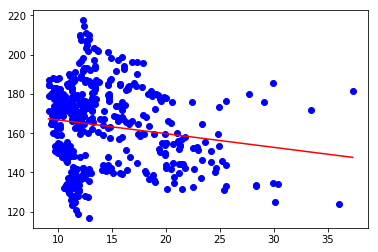

In [21]:
 # Create a handle for each plot
plt.scatter(vix_fb_df["VIX Close"], vix_fb_df["FB Close"],color="blue", linewidth=1, label="VIX Close Price")
plt.plot(np.unique(vix_fb_df["VIX Close"]), np.poly1d(np.polyfit(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], 1))(np.unique(vix_fb_df["VIX Close"])), color = "red")

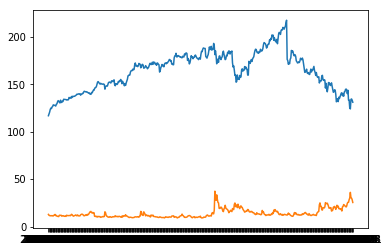

In [22]:
plt.plot(vix_fb_df["Date"], vix_fb_df["FB Close"])
plt.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"])
plt.show()

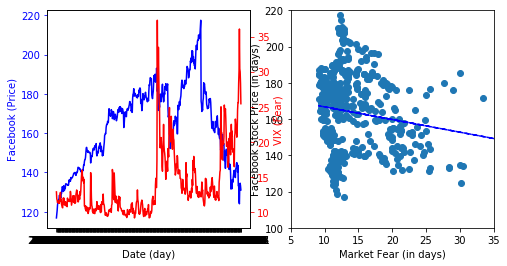

In [65]:
fig, ax1 = plt.subplots(1, 2, figsize=(8, 4))
ax1[0].plot(vix_fb_df["Date"], vix_fb_df["FB Close"], 'b-')
ax1[0].set_xlabel('Date (day)')

# Make the y-axis label, ticks and tick labels match the line color.
ax1[0].set_ylabel('Facebook (Price)', color='b')
ax1[0].tick_params('y', colors='b')

ax2 = ax1[0].twinx()
ax2.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"], 'r-')

ax2.set_ylabel('VIX (Fear)', color='r')
ax2.tick_params('y', colors='r')

# fig.tight_layout()

# # Save Figure
# plt.savefig("dualaxes_line_plot.png", bbox_inches="tight")

(slope, intercept, _, _, _) = linregress(vix_fb_df["VIX Close"], vix_fb_df["FB Close"])
fit = slope * vix_fb_df["VIX Close"] + intercept

ax1[1].set_xlim(5, 35)
ax1[1].set_ylim(100, 220)

ax1[1].set_xlabel("Market Fear (in days)")
ax1[1].set_ylabel("Facebook Stock Price (in days)")

ax1[1].plot(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], linewidth=0, marker='o')
ax1[1].plot(vix_fb_df["VIX Close"], fit, 'b--')

plt.subplots_adjust(hspace=-5)

# Save Figure
plt.savefig("combine_line-scatter_plot.png", bbox_inches="tight")

# plt.show()
plt.show()

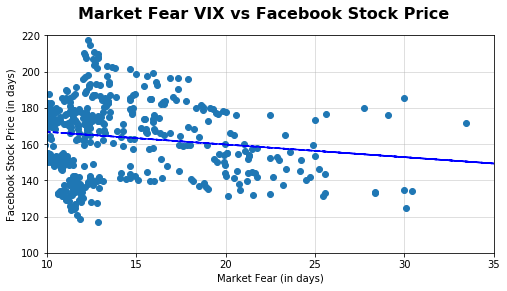

In [46]:
(slope, intercept, _, _, _) = linregress(vix_fb_df["VIX Close"], vix_fb_df["FB Close"])
fit = slope * vix_fb_df["VIX Close"] + intercept

fig, ax = plt.subplots(figsize=(8, 4))

fig.suptitle("Market Fear VIX vs Facebook Stock Price", fontsize=16, fontweight="bold")

ax.set_xlim(10, 35)
ax.set_ylim(100, 220)
plt.grid(axis='both', alpha=0.5)

ax.set_xlabel("Market Fear (in days)")
ax.set_ylabel("Facebook Stock Price (in days)")

ax.plot(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], linewidth=0, marker='o')
ax.plot(vix_fb_df["VIX Close"], fit, 'b--')

# Save Figure
plt.savefig("linreg_scatter_plot.png", bbox_inches="tight")

plt.show()

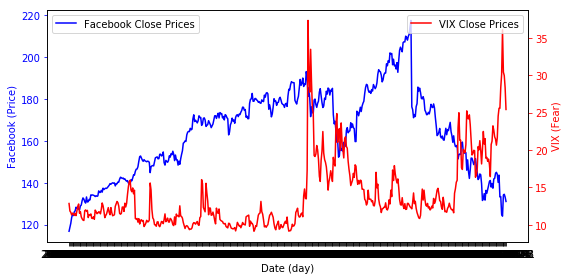

In [56]:
fig, ax1 = plt.subplots(figsize=(8, 4))
fb_handle, = ax1.plot(vix_fb_df["Date"], vix_fb_df["FB Close"], 'b-')
ax1.set_xlabel('Date (day)')
plt.legend(loc="upper left")

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Facebook (Price)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
vix_handle, = ax2.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"], 'r-')

ax2.set_ylabel('VIX (Fear)', color='r')
ax2.tick_params('y', colors='r')

ax1.legend(['Facebook Close Prices'], loc='upper left')
ax2.legend(['VIX Close Prices'], loc='upper right')
# plt.legend(loc="upper left")

fig.tight_layout()


# Create a legend


# Save Figure
plt.savefig("dualaxes_line_plot.png", bbox_inches="tight")